# Deaths and Births

Getting datasets list: 100%|██████████| 213/213 [00:00<00:00, 231.42it/s]

!!! Wrong query or api.insee.fr error !!!
1/1 - Getting series: 100%|██████████| 2/2 [00:06<00:00,  3.24s/it]
Data has been cached



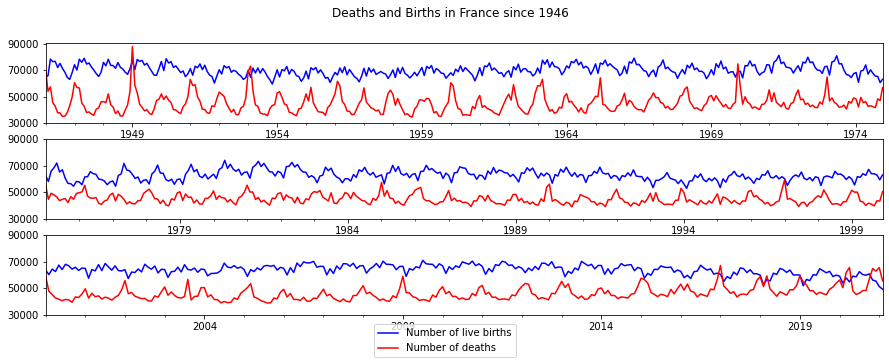

In [1]:
from pynsee.macrodata import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os 
# Beware : any change to the keys should be tested in a new python session
#os.environ['insee_key'] = "my_insee_key"
#os.environ['insee_secret'] = "my_insee_secret"

insee_data = get_dataset_list()

df_idbank = get_idbank_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_insee_idbank(df_idbank.idbank)

data = split_title(data)

data['period'] = np.select([(data.index < '1975-01-01'),
                            (data.index >= '1975-01-01') & (data.index < '2000-01-01'),
                            (data.index >= '2000-01-01')],
                            ['1946 - 1974', '1975 - 1999', '2000 - today'])



data = data.reset_index()
conditions = [data.IDBANK=="000436391", data.IDBANK=="000436394"]
values = ["blue", "red"]
data['color'] = np.select(conditions, values)

# plot
fig, axes = plt.subplots(3,1, figsize=(15,5))
plt.suptitle("Deaths and Births in France since 1946")

for (period, group), ax in zip(data.groupby('period'), axes.flatten()):
    for (var, group2) in group.groupby(['color', 'TITLE_EN2']):
        group2.plot(x='DATE', y='OBS_VALUE',
                    kind='line', ax=ax,
                    color = var[0], label = var[1],
                    legend=False).xaxis.label.set_visible(False)
        ax.set_yticks(list(range(30000,100000,20000)))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')